In [2]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot  as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("rawdate.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,master's degree,standard,none,62,70,75
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83
2,female,group D,some college,free/reduced,none,79,89,86
3,male,group C,master's degree,free/reduced,none,61,67,66
4,male,group E,high school,standard,none,73,64,57


In [5]:
df.shape

(800, 8)

(1)Dataset information
*gender : sex of students -> (Male/female)
&race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
*parental level of education : parents' final education ->(bachelor's degree,some college,*master's degree,associate's degree,high school)
*lunch : having lunch before test (standard or free/reduced)
*test preparation course : complete or not complete before test
*math score
*reading score
*writing score

(2)Data Checks to perform
*Check Missing values
*Check Duplicates
*Check data type
*Check the number of unique values of each column
*Check statistics of data set
*Check various categories present in the different categorical column

In [6]:
#Check missing value

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
#there is no missing values

In [9]:
#Checking Duplicates Values

In [10]:
df.duplicated().sum()

0

In [11]:
#there is no duplicates

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       800 non-null    object
 1   race_ethnicity               800 non-null    object
 2   parental_level_of_education  800 non-null    object
 3   lunch                        800 non-null    object
 4   test_preparation_course      800 non-null    object
 5   math_score                   800 non-null    int64 
 6   reading_score                800 non-null    int64 
 7   writing_score                800 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 50.1+ KB


In [13]:
#Checking the unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     77
reading_score                  69
writing_score                  71
dtype: int64

In [14]:
#Statistics Checks
df.describe()

,math_score,reading_score,writing_score
count,800.000000,800.000000,800.000000
mean,66.496250,69.555000,68.456250
std,15.024302,14.461532,15.085342
min,8.000000,24.000000,15.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [17]:
#Define Numerical and categorical columns
Numerical_columns = [feature for feature in df.columns if df[feature].dtype !='object']
Categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'object']

In [18]:
print("We have {} numerical columns :{}".format(len(Numerical_columns),Numerical_columns))
print("We have {} Categorical columns :{}".format(len(Categorical_columns),Categorical_columns))

We have 3 numerical columns :['math_score', 'reading_score', 'writing_score']
We have 5 Categorical columns :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [21]:
#Adding Columns For 'Total_Score' and 'Average'
df['TOtal_Score'] = df.writing_score + df.reading_score + df.math_score
df['Average'] = df.TOtal_Score/3

In [22]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,TOtal_Score,Average
0,female,group D,master's degree,standard,none,62,70,75,207,69.000000
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83,232,77.333333
2,female,group D,some college,free/reduced,none,79,89,86,254,84.666667
3,male,group C,master's degree,free/reduced,none,61,67,66,194,64.666667
4,male,group E,high school,standard,none,73,64,57,194,64.666667
...,...,...,...,...,...,...,...,...,...,...
795,female,group D,master's degree,standard,none,87,100,100,287,95.666667
796,male,group C,bachelor's degree,standard,none,69,63,61,193,64.333333
797,female,group C,associate's degree,standard,none,53,62,53,168,56.000000
798,male,group C,some college,free/reduced,completed,50,48,53,151,50.333333


In [28]:
reading_ful = df[df['reading_score'] ==100]["Average"].count()
writing_ful = df[df['writing_score'] ==100]['Average'].count()
math_ful = df[df['math_score'] ==100]['Average'].count()
print(f"Number of Students with full marks in reading :{reading_ful}")
print(f"Number of Students with full marks in writing :{writing_ful}")
print(f"Number of Students with full marks in Maths :{math_ful}")




Number of Students with full marks in reading :17
Number of Students with full marks in writing :13
Number of Students with full marks in Maths :6


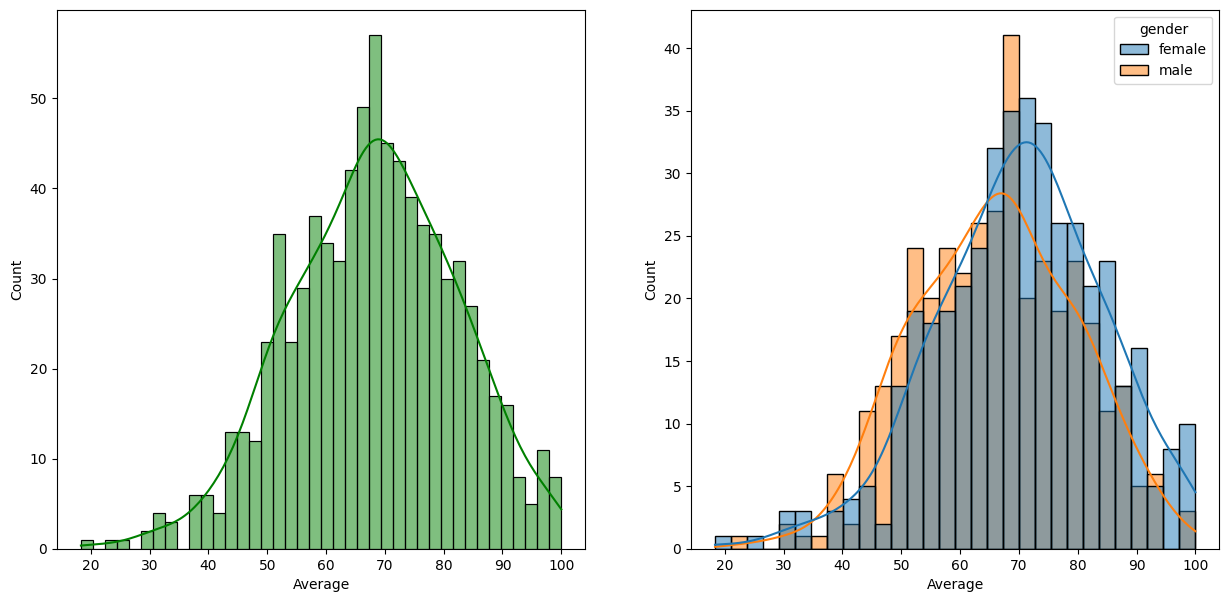

In [30]:
#Data Visualization
fig,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sbn.histplot(data =df,x='Average',bins = 40,kde=True,color='g')
plt.subplot(122)
sbn.histplot(data=df,x='Average',bins=30,kde =True,hue="gender")
plt.show()

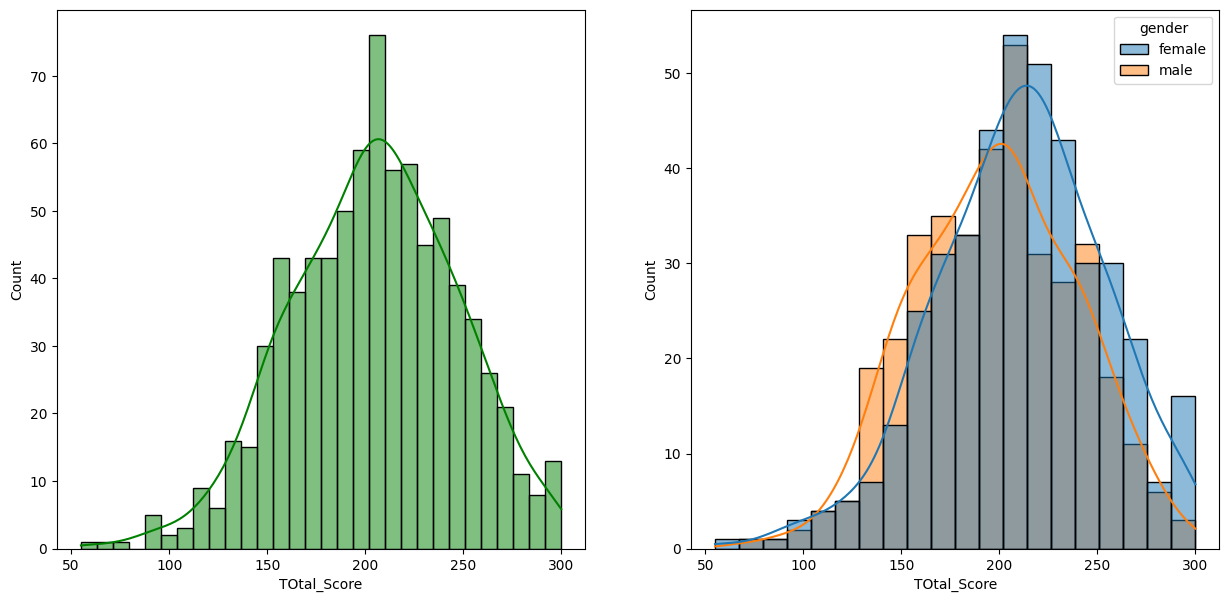

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sbn.histplot(data=df,x='TOtal_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sbn.histplot(data=df,x='TOtal_Score',kde=True,hue='gender')
plt.show()

In [34]:
#Female Student trend to Preform well than male Students

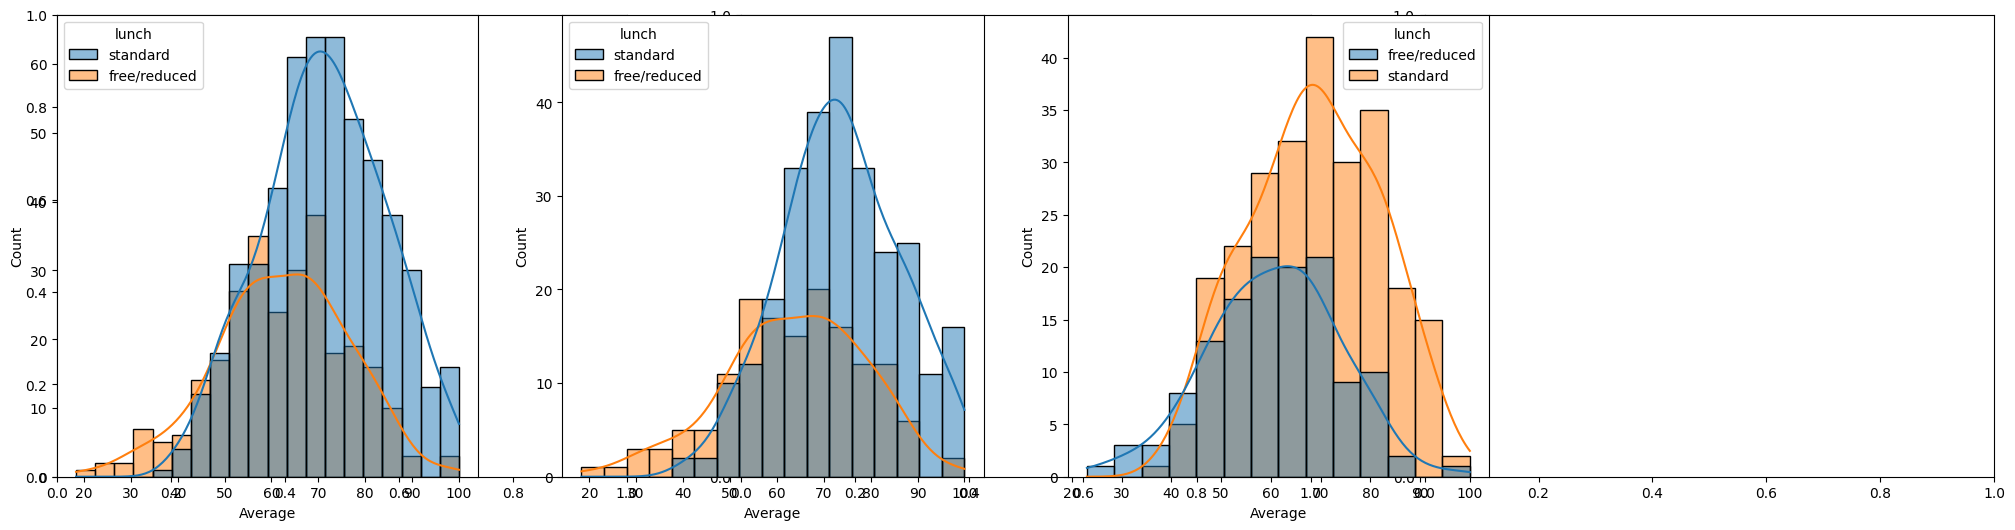

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sbn.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sbn.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sbn.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

In [37]:
#Standard Lunch helps to perform well in exam
#Standard lunch helps to perform well for both male and female in exams

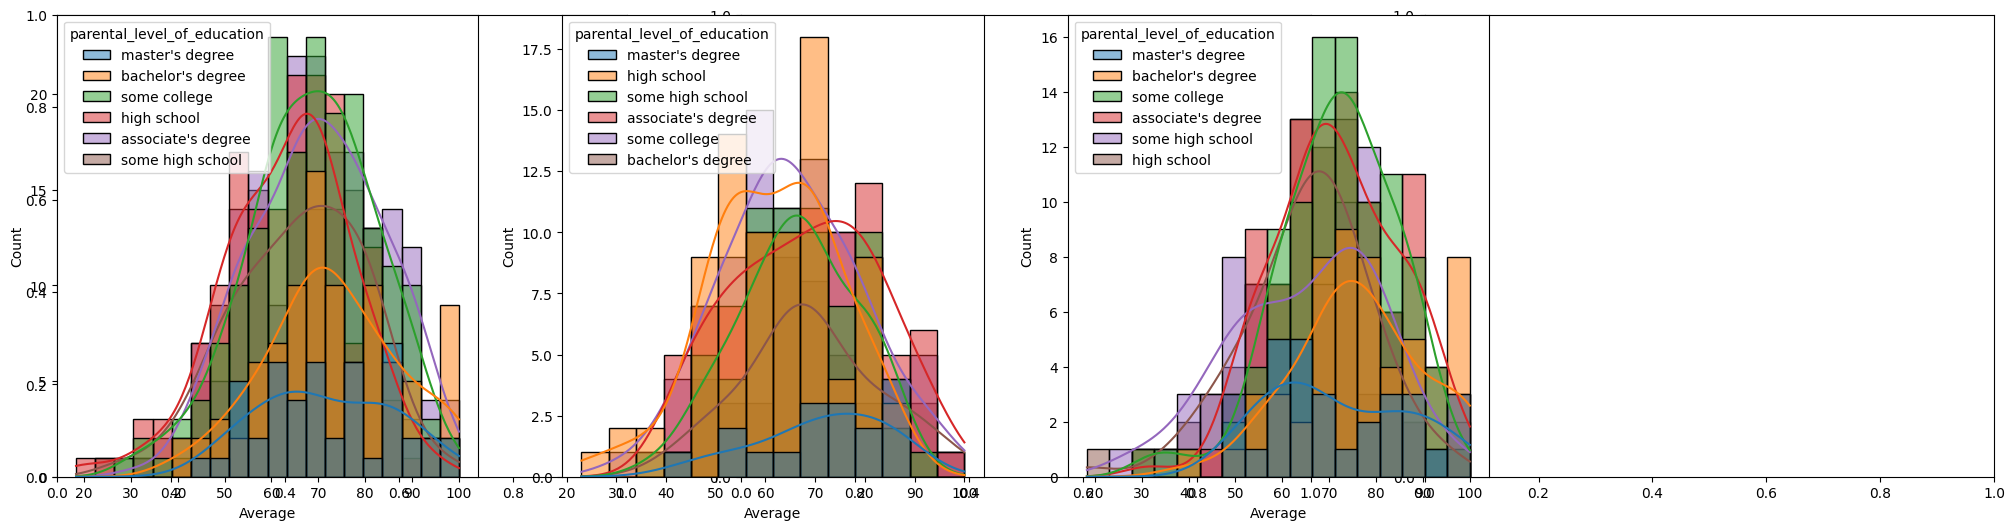

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sbn.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sbn.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sbn.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()